In [ ]:
!pwd

/content


In [ ]:
!mkdir clothes_dataset
# ! 터미널 명령어어

mkdir: cannot create directory ‘clothes_dataset’: File exists


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/clothes_dataset.zip' -d ./clothes_dataset/

# 터미널 명령어를 통해 압축된 데이터의 압축 해제제

In [ ]:
# 디렉토리로 구분된 데이터 가져오기기

import numpy as np
import pandas as pd
import tensorflow as tf
import glob as glob
import cv2

#  해당 데이터는 디렉토리로 분류가 나누어져 있다.

all_data = np.array(glob.glob('/content/clothes_dataset/*/*.jpg', recursive=True))
# 해당 데이터 폴더 하위 모든 데이터를 가져온다.


# 색과 옷의 종류를 구별하기 위해 해당되는 label에 1을 삽입합니다.
def check_cc(color, clothes):
    labels = np.zeros(11,)
    # 컬러 종류 + 옷 종류 11 가지, 영행렬렬


    # color check
    if(color == 'black'):
        labels[0] = 1
        color_index = 0
    elif(color == 'blue'):
        labels[1] = 1
        color_index = 1
    elif(color == 'brown'):
        labels[2] = 1
        color_index = 2
    elif(color == 'green'):
        labels[3] = 1
        color_index = 3
    elif(color == 'red'):
        labels[4] = 1
        color_index = 4
    elif(color == 'white'):
        labels[5] = 1
        color_index = 5
        
    # clothes check
    if(clothes == 'dress'):
        labels[6] = 1
    elif(clothes == 'shirt'):
        labels[7] = 1
    elif(clothes == 'pants'):
        labels[8] = 1
    elif(clothes == 'shorts'):
        labels[9] = 1
    elif(clothes == 'shoes'):
        labels[10] = 1
        
    return labels, color_index
    # 한 데이터에 대한 라벨과 색 인덱스를 반환한다.



# label과 color_label을 담을 배열을 선언합니다.
all_labels = np.empty((all_data.shape[0], 11))
# 행의 개수가 데이터 개수만큼 있는 모든 라벨을 담을 0 행렬

all_color_labels = np.empty((all_data.shape[0], 1))
# 행의 개수가 데이터 개수만큼 있는 컬러 인덱스를 담을 0 행렬




# 실제로 컬럼에 데이터를 넣는 부분분

# print(all_data[0])
for i, data in enumerate(all_data):
    color_and_clothes = all_data[i].split('/')[-2].split('_')
    # .split('/')[-2] 전체 경로명에서 라벨로 쓰일 폴더 디렉토리리

    # 하위 폴더명이 blue_dress , color_cloths
    color = color_and_clothes[0]
    clothes = color_and_clothes[1]
    # print(color,clothes)
    
    # 폴더명에 따라 라벨로 바꾸는 전처리 과정정
    labels, color_index = check_cc(color, clothes)
    #check_cc 위에서 선언된 함수


    all_labels[i] = labels
    all_color_labels[i] = color_index
    
all_labels = np.concatenate((all_labels, all_color_labels), axis = -1)
# axis = -1 컬럼 옆으로 붙인다.


In [ ]:
all_labels.shape

(11385, 12)

In [ ]:
all_labels

array([[0., 0., 0., ..., 0., 1., 4.],
       [0., 0., 0., ..., 0., 1., 4.],
       [0., 0., 0., ..., 0., 1., 4.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련, 검증, 테스트 데이터셋으로 나눕니다.
train_x, test_x, train_y, test_y = train_test_split(all_data, all_labels, shuffle = True, test_size = 0.3,
                                                   random_state = 99)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, shuffle = True, test_size = 0.3,
                                                 random_state = 99)

In [ ]:
# 라벨에 맞게 콜럼을 매칭

train_df = pd.DataFrame({'image':train_x, 'black':train_y[:, 0], 'blue':train_y[:, 1],
                        'brown':train_y[:, 2], 'green':train_y[:, 3], 'red':train_y[:, 4],
                        'white':train_y[:, 5], 'dress':train_y[:, 6], 'shirt':train_y[:, 7],
                        'pants':train_y[:, 8], 'shorts':train_y[:, 9], 'shoes':train_y[:, 10],
                        'color':train_y[:, 11]})

val_df = pd.DataFrame({'image':val_x, 'black':val_y[:, 0], 'blue':val_y[:, 1],
                        'brown':val_y[:, 2], 'green':val_y[:, 3], 'red':val_y[:, 4],
                        'white':val_y[:, 5], 'dress':val_y[:, 6], 'shirt':val_y[:, 7],
                        'pants':val_y[:, 8], 'shorts':val_y[:, 9], 'shoes':val_y[:, 10],
                        'color':val_y[:, 11]})

test_df = pd.DataFrame({'image':test_x, 'black':test_y[:, 0], 'blue':test_y[:, 1],
                        'brown':test_y[:, 2], 'green':test_y[:, 3], 'red':test_y[:, 4],
                        'white':test_y[:, 5], 'dress':test_y[:, 6], 'shirt':test_y[:, 7],
                        'pants':test_y[:, 8], 'shorts':test_y[:, 9], 'shoes':test_y[:, 10],
                        'color':test_y[:, 11]})

In [ ]:
train_df.head()

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes,color
0,/content/clothes_dataset/green_shorts/e74d11d3...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
1,/content/clothes_dataset/black_dress/f1be32393...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,/content/clothes_dataset/black_shoes/04f78f68a...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,/content/clothes_dataset/brown_pants/0671d132b...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,/content/clothes_dataset/white_shoes/59803fb01...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0


In [ ]:
!pwd

/content


In [ ]:
!mkdir csv_data

mkdir: cannot create directory ‘csv_data’: File exists


In [ ]:
# 각 데이터프레임을 csv 로 저장
train_df.to_csv('/content/csv_data/train.csv',index=False)
val_df.to_csv('/content/csv_data/val.csv',index=False)
test_df.to_csv('/content/csv_data/test.csv',index=False)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 이미지 데이터를 출력하는 객체 생성
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


# batch_size 만큼 데이터를 학습시킬때, 모든 데이터를 학습시킬 때 까지 걸리는 단계를 출력하는 함수.
def get_steps(num_samples, batch_size):
  if (num_samples % batch_size) > 0:
    return ( num_samples // batch_size ) + 1

  else :
    return ( num_samples // batch_size )


from keras.models import Sequential
from keras.layers import Dense, Flatten


# 모델의 신경망을 구성

model = Sequential()
model.add(Flatten(input_shape=(112,112,3)))
# 3 : rgb값

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(11,activation='sigmoid'))
# 컬러 인덱스를 제외한 컬러 + 옷 종류
# 소프트 맥스 -> 다중 분류
# 시그모이드 -> 다중 레이블
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 37632)             0         
                                                                 
 dense (Dense)               (None, 128)               4817024   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 11)                715       
                                                                 
Total params: 4,825,995
Trainable params: 4,825,995
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_df.columns

Index(['image', 'black', 'blue', 'brown', 'green', 'red', 'white', 'dress',
       'shirt', 'pants', 'shorts', 'shoes', 'color'],
      dtype='object')

In [ ]:
batch_size = 32
class_col = ['black', 'blue', 'brown', 'green', 'red', 'white', 'dress',
       'shirt', 'pants', 'shorts', 'shoes']

In [ ]:
# 이미지 데이터를 출력하는 객체의 세부 설정
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df, 
                                                    x_col = 'image', 
                                                    y_col = class_col, 
                                                    target_size=(112,112),
                                                    color_mode = 'rgb',
                                                    class_mode = 'raw',
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    seed = 42)


val_generator = val_datagen.flow_from_dataframe(dataframe=val_df, 
                                                    x_col = 'image', 
                                                    y_col = class_col, 
                                                    target_size=(112,112),
                                                    color_mode = 'rgb',
                                                    class_mode = 'raw',
                                                    batch_size = batch_size,
                                                    shuffle = True
                                                )
# 데이터를 데이터 프레임에서 불러오는 것이 있고, 디렉토리 경로에서 가져오는 함수도 있다. 디렉토리로 불러올 경우 경우로 통해서 레이블이 맞쳐져 있어야 한다.

Found 5578 validated image filenames.
Found 2391 validated image filenames.


In [ ]:
model.fit(train_generator,
          steps_per_epoch = get_steps(len(train_df), batch_size),
          validation_data= val_generator,
          validation_steps = get_steps(len(val_df),batch_size),
          epochs = 10
          )

# 데이터를 한 단계에 batch_size 개수 씩 get_steps(len(train_df), batch_size) 번 학습.


Epoch 1/10
175/175 [==============================] - 35s 193ms/step - loss: 0.5157 - binary_accuracy: 0.8468 - val_loss: 0.2949 - val_binary_accuracy: 0.8809
Epoch 2/10
175/175 [==============================] - 32s 186ms/step - loss: 0.2912 - binary_accuracy: 0.8845 - val_loss: 0.2958 - val_binary_accuracy: 0.8842
Epoch 3/10
175/175 [==============================] - 33s 187ms/step - loss: 0.2586 - binary_accuracy: 0.8966 - val_loss: 0.2659 - val_binary_accuracy: 0.8977
Epoch 4/10
175/175 [==============================] - 31s 177ms/step - loss: 0.2228 - binary_accuracy: 0.9102 - val_loss: 0.2550 - val_binary_accuracy: 0.8994
Epoch 5/10
175/175 [==============================] - 34s 196ms/step - loss: 0.2095 - binary_accuracy: 0.9167 - val_loss: 0.2666 - val_binary_accuracy: 0.9018
Epoch 6/10
175/175 [==============================] - 31s 178ms/step - loss: 0.1942 - binary_accuracy: 0.9220 - val_loss: 0.2117 - val_binary_accuracy: 0.9124
Epoch 7/10
175/175 [==========================

In [ ]:
# 모델 예측
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df, 
                                                    x_col = 'image', 
                                                    #y_col = None, # 지우거나, 테스트 데이터는 결과를 주지 않는다. 
                                                    target_size=(112,112),
                                                    color_mode = 'rgb',
                                                    class_mode = None ,# 지우거나
                                                    batch_size = batch_size,
                                                    shuffle = False)

preds = model.predict(test_generator,steps = get_steps(len(test_df),batch_size), verbose = 1) 

Found 3416 validated image filenames.
107/107 [==============================] - 14s 135ms/step


In [ ]:
import matplotlib.pyplot as plt

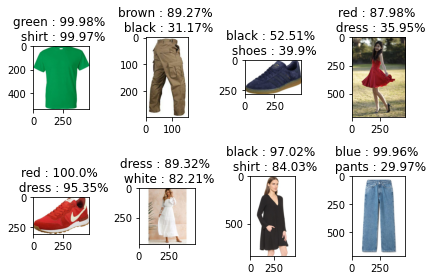

In [ ]:
# 예측 결과를 확인
do_preds = preds[:8]
# 8 개만
for i, pred in enumerate(do_preds):
  plt.subplot(2,4,i+1)
  prob = zip(class_col, list(pred))
  # pred에는 각 콜럼일 확률이 모두 있다.

  # print(list(prob))
  prob = sorted(list(prob), key = lambda x : x[1], reverse = True)
  # 모든 확률에 대해 가장 큰 값으로 정렬하면서, 매칭해준 class_col 도 정렬된다.

  # print(prob)

  image = cv2.imread(test_df['image'][i])
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

  plt.imshow(image)
  plt.title(f'{prob[0][0]} : {round(prob[0][1]*100, 2)}% \n {prob[1][0]} : {round(prob[1][1]*100, 2)}%')
  # 가장 확률이 큰 값과 두 번째로 확률이 큰 값을 출력한다.

plt.tight_layout()
plt.show()

In [ ]:
# 외부에서 가져온 데이터 예측해보기

data_datagen = ImageDataGenerator(rescale=1./255)
data_generator = data_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/06_clothes_img',
    target_size=(112,112),
    color_mode = 'rgb',
    batch_size = batch_size,
    shuffle = False
    )

# 학습시킨 데이터에 하위 폴더가 존재하였음으로, 해당 폴더 내의 하위 폴더에 데이터가 존재하여야한다???

result = model.predict(data_generator,steps=get_steps(2,batch_size),verbose=1)

Found 2 images belonging to 1 classes.
1/1 [==============================] - 0s 79ms/step


In [ ]:
np.round(result, 2)

array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.74, 0.08, 0.01, 0.  , 0.26],
       [0.63, 0.  , 0.11, 0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.72]],
      dtype=float32)

In [ ]:
for i ,pred in enumerate(result):
  prob = zip(class_col, list(pred))
  prob = sorted(list(prob), key = lambda x: x[1], reverse = True)
  print((f'{prob[0][0]}: {round(prob[0][1]*100,2)}% \n {prob[1][0]}: {round(prob[1][1]*100,2)}%'))

blue: 99.99% 
 dress: 74.06%
shoes: 71.78% 
 black: 62.6%
